# Data

dataset dapat diakses [di sini](https://drive.google.com/drive/folders/1S04hk5uHfHYe6J1S6fVqDunuja1Lk1Lo)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind

#   import warnings
# warnings.filterwarnings("ignore")

Dataset ini berisi informasi terkait transaksi pada transportasi publik Trans Jakarta. Ada 22 kolom di dalam dataset Transjakarta, yaitu :
* `transID`: Id transaksi unik untuk setiap transaksi
* `payCardID`: Tanda pengenal utama pelanggan. Kartu yang digunakan pelanggan sebagai tiket masuk dan keluar.
* `payCardBank`: Nama bank penerbit kartu nasabah
* `payCardName`:  Nama pelanggan yang tertera pada kartu.
* `payCardSex`: Jenis kelamin pelanggan yang tertanam dalam kartu
* `payCardBirthDate`: Tahun kelahiran pelanggan
* `corridorID`: ID Koridor / ID Rute sebagai kunci untuk pengelompokan rute.
* `corridorName`: Nama Koridor / Nama Rute berisi Start dan Finish untuk setiap rute.
* `direction`: 0 untuk Maju, 1 untuk Kembali. Arah rute.
* `tapInStops`: Tap In (pintu masuk) ID Halte untuk mengidentifikasi nama halte
* `tapInStopsName`: Tap In (pintu masuk) Nama Halte tempat pelanggan melakukan tap in.
* `tapInStopsLat`: Latitude of Tap In Stops/ garis lintang Tap In Stops
* `tapInStopsLon`: Longitude of Tap In Stops/ garis bujur Tap In Stops
* `stopStartSeq`: Urutan pemberhentian, pemberhentian pertama, pemberhentian kedua, dll. Terkait dengan arah.
* `tapInTime`: Waktu masuk. Tanggal dan waktu
* `tapOutStops`:  ID Pemberhentian untuk mengidentifikasi nama pemberhentian
* `tapOutStopsName`: Tap out (keluar) Nama Pemberhentian tempat pelanggan melakukan tap out.
* `tapOutStopsLat`: garis lintang Tap Out Stops
* `tapOutStopsLon`: garis bujur Tap Out Stops
* `stopEndSeq`: Urutan pemberhentian, pemberhentian pertama, pemberhentian kedua, dll. Terkait dengan arah.
* `tapOutTime`: Waktu ketuk keluar. Tanggal dan waktu
* `payAmount`:  Jumlah yang harus dibayar pelanggan. Ada yang gratis. Beberapa tidak.


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
transjakarta_df = pd.read_csv("/content/Transjak.csv", delimiter=",")

Berikut 5 baris teratas dan terbawah dari dataset Transjakarta:

In [ ]:
display(transjakarta_df.head(),transjakarta_df.tail())

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,...,106.84402,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,...,106.83302,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,...,106.81435,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,...,106.93526,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,...,106.88900,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0


,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
37895,ZWEC949B8Q87QG,4685818286724028395,brizzi,Kamila Mahendra,F,2004,6B,Ragunan - MH Thamrin via Semanggi,1.0,P00261,...,106.82309,2,2023-04-21 18:18:37,P00228,SMK 57,-6.290967,106.82365,13.0,2023-04-21 19:55:49,3500.0
37896,YHHK837P6Y95GN,6502902290603767,dki,Titi Siregar,M,1974,9N,Pinang Ranti - Pramuka,1.0,P00064,...,106.88116,1,2023-04-18 21:52:31,P00179,Pinang Ranti,-6.291075,106.88634,2.0,2023-04-18 22:28:22,3500.0
37897,YXPP627N4G95HO,213159426675861,emoney,drg. Zahra Nashiruddin,F,1976,1T,Cibubur - Balai Kota,1.0,B02873P,...,106.81676,12,2023-04-04 10:29:47,B00226P,Buperta Cibubur,-6.370321,106.89628,14.0,2023-04-04 13:27:25,20000.0
37898,RGVK175U2U98UV,377840859133591,emoney,Ana Agustina,M,1976,JAK.13,Tanah Abang - Jembatan Lima,1.0,B02505P,...,106.80954,33,2023-04-15 19:59:26,B01787P,JPO Blok G,-6.188861,106.81135,34.0,2023-04-15 20:27:50,0.0
37899,FMZZ963S4B68ZP,501862539795,flazz,drg. Leo Najmudin,F,1985,13,Ciledug - Tendean,0.0,P00001,...,106.74786,2,2023-04-12 21:08:12,P00106,Kebayoran Lama,-6.238340,106.77752,7.0,2023-04-12 21:34:53,3500.0


## Data Understanding and Cleaning

Sebelum masuk ke dalam analisis, kita perlu mengenal dataset kita lebih jauh dalam tahapan data understanding. Dari proses ini, kita akan tahu anomali-anomali apa saja yang terdapat di dalam dataset kita dan perlu ditangani dalam tahapan data cleaning. Setiap penangan anomali yang dilakukan, akan disertai dengan justifikasi langkah yang diambil, baik secara domain knowledge maupun secara statistik.

In [ ]:
print(f"Jumlah baris dan kolom di dataset Transjakarta adalah {transjakarta_df.shape}")

Jumlah baris dan kolom di dataset Transjakarta adalah (37900, 22)


In [ ]:
transjakarta_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37900 entries, 0 to 37899
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transID           37900 non-null  object 
 1   payCardID         37900 non-null  int64  
 2   payCardBank       37900 non-null  object 
 3   payCardName       37900 non-null  object 
 4   payCardSex        37900 non-null  object 
 5   payCardBirthDate  37900 non-null  int64  
 6   corridorID        36643 non-null  object 
 7   corridorName      35970 non-null  object 
 8   direction         37900 non-null  float64
 9   tapInStops        36687 non-null  object 
 10  tapInStopsName    37900 non-null  object 
 11  tapInStopsLat     37900 non-null  float64
 12  tapInStopsLon     37900 non-null  float64
 13  stopStartSeq      37900 non-null  int64  
 14  tapInTime         37900 non-null  object 
 15  tapOutStops       35611 non-null  object 
 16  tapOutStopsName   36556 non-null  object

In [ ]:
display(transjakarta_df.describe(), transjakarta_df.describe(include='object'))

,payCardID,payCardBirthDate,direction,tapInStopsLat,tapInStopsLon,stopStartSeq,tapOutStopsLat,tapOutStopsLon,stopEndSeq,payAmount
count,3.790000e+04,37900.000000,37900.000000,37900.000000,37900.000000,37900.000000,36556.000000,36556.000000,36556.000000,36893.000000
mean,4.250060e+17,1990.089314,0.500633,-6.214838,106.841554,13.572480,-6.214651,106.841233,21.219909,2699.712683
std,1.321699e+18,13.051482,0.500006,0.057911,0.060369,12.237623,0.059022,0.060999,13.800689,4212.225592
min,6.040368e+10,1946.000000,0.000000,-6.394973,106.614730,0.000000,-6.394973,106.614730,1.000000,0.000000
25%,1.800442e+14,1982.000000,0.000000,-6.245863,106.803470,4.000000,-6.247225,106.801750,11.000000,0.000000
50%,3.507947e+15,1990.000000,1.000000,-6.214587,106.834830,10.000000,-6.214718,106.834580,18.000000,3500.000000
75%,4.699023e+15,2001.000000,1.000000,-6.175528,106.882270,19.000000,-6.174736,106.883030,29.000000,3500.000000
max,4.997694e+18,2012.000000,1.000000,-6.089429,107.023950,68.000000,-6.091746,107.023660,77.000000,20000.000000


,transID,payCardBank,payCardName,payCardSex,corridorID,corridorName,tapInStops,tapInStopsName,tapInTime,tapOutStops,tapOutStopsName,tapOutTime
count,37900,37900,37900,37900,36643,35970,36687,37900,37900,35611,36556,36556
unique,37900,6,1993,2,221,216,2570,2602,37079,2230,2248,35908
top,EIIW227B8L34VB,dki,Fathonah Saefullah,F,1T,Cibubur - Balai Kota,P00170,Penjaringan,2023-04-25 06:23:00,P00016,BKN,2023-04-10 19:10:15
freq,1,18743,80,20157,400,391,236,243,3,306,316,3


In [ ]:
import pandas as pd

# Set option to display the entire content of each cell
pd.set_option('display.max_colwidth', None)# data unik di tiap kolom
listItem = []
for col in transjakarta_df.columns :
    listItem.append( [col, transjakarta_df[col].nunique(), transjakarta_df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

NameError: name 'pd' is not defined

Secara umum, kita bisa melihat bahwa:

* Dataset Transjakarta memiliki 22 kolom dan 37079 baris
* Beberapa kolom, yaitu, '`corridorID`', '`corridorName`', '`tapInStops`','`tapOutStops`','`tapOutStopsName`', '`tapOutStopsLat`', '`tapOutStopsLon`','`stopEndSeq`', '`tapOutTime`', '`payAmount`' memiliki data kosong. Data kosong pada kolom-kolom tersebut diwakili dengan data NaN.
* Terdapat 37900 transasksi telah terjadi
* Terdapat 2000 Tanda pengenal utama pelanggan atau kartu yang digunakan pelanggan sebagai tiket masuk dan keluar.
* Terdapat 6 nama bank penerbit kartu nasabah yaitu emoney, dki, flazz, online, brizzi, bni
* Terdapat 1993 Nama pelanggan yang tertera pada kartu
* Terdapat 2 Jenis kelamin pelanggan yang tertanam dalam kartu yaitu M dan F
* Pelanggan berlatar belakang dari berbagai kalangan umur
* Terdapat 221 ID Rute sebagai kunci untuk pengelompokan rute
* Terdapat 216 Nama Rute berisi Start dan Finish untuk setiap rute
* Terdapat 2 arah yaitu rute pergi dan pulang
* Terdapat 2570 ID nama halte pemberangkatan
* Terdapat 2602 Nama Halte pemberangkatan pelanggan
* Terdapat 2587 Garis Lintang pemberangkatan
* Terdapat 2458 Garis Bujur pemberangkatan
* Terdapat 67 Urutan pemberhentian, pemberhentian pertama, pemberhentian kedua, dll. Terkait dengan arah pergi .
* Terdapat 37079 Waktu pendaftaran masuk ke sistem transportasi
* Terdapat 2230 ID nama halte pemberhentian
* Terdapat 2248 nama halte pemberhentian
* Terdapat 2237 Garis Lintang pemberhentian
* Terdapat 2139 Garis Bujur pemberhentian
* Terdapat 74 Urutan pemberhentian, pemberhentian pertama, pemberhentian kedua, dll. Terkait dengan arah pulang.
* Terdapat 35908 waktu keluar
* Terdapat 3 jenis total pembayaran 3.500, 20.000, dan 0

In [ ]:
transjakarta_df.corr()

<ipython-input-72-425681408091>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  transjakarta_df.corr()


,payCardID,payCardBirthDate,direction,tapInStopsLat,tapInStopsLon,stopStartSeq,tapOutStopsLat,tapOutStopsLon,stopEndSeq,payAmount
payCardID,1.000000,0.000939,0.000839,-0.014416,-0.035232,-0.027670,-0.007771,-0.032021,-0.045616,0.061040
payCardBirthDate,0.000939,1.000000,0.001615,0.061717,-0.033932,-0.025739,0.039884,-0.033193,-0.028652,0.066837
direction,0.000839,0.001615,1.000000,0.002996,-0.007578,-0.051265,-0.058007,0.045972,-0.044204,0.001040
tapInStopsLat,-0.014416,0.061717,0.002996,1.000000,0.026214,-0.001103,0.899224,0.033296,-0.012108,-0.124661
tapInStopsLon,-0.035232,-0.033932,-0.007578,0.026214,1.000000,0.043186,0.035634,0.892529,0.080392,-0.190337
stopStartSeq,-0.027670,-0.025739,-0.051265,-0.001103,0.043186,1.000000,-0.017807,0.037464,0.825642,-0.250072
tapOutStopsLat,-0.007771,0.039884,-0.058007,0.899224,0.035634,-0.017807,1.000000,0.016244,-0.025369,-0.141596
tapOutStopsLon,-0.032021,-0.033193,0.045972,0.033296,0.892529,0.037464,0.016244,1.000000,0.073888,-0.191884
stopEndSeq,-0.045616,-0.028652,-0.044204,-0.012108,0.080392,0.825642,-0.025369,0.073888,1.000000,-0.323909
payAmount,0.061040,0.066837,0.001040,-0.124661,-0.190337,-0.250072,-0.141596,-0.191884,-0.323909,1.000000


Korelasi positif yang tinggi antara kolom-kolom seperti `tapInStopsLat` dan `tapOutStopsLat`, `tapInStopsLon` dan `tapOutStopsLon`, serta `stopStartSeq` dan `stopEndSeq` menunjukkan hubungan yang erat antara variabel-variabel tersebut. Dalam konteks data Transjakarta, korelasi positif yang tinggi ini mengindikasikan:

1. **Hubungan spasial antara lokasi tap in dan tap out**: Korelasi positif yang tinggi antara `tapInStopsLat` dan `tapOutStopsLat`, serta `tapInStopsLon` dan `tapOutStopsLon`, menunjukkan bahwa destinasi tap out cenderung berada dekat dengan tempat tap in. Ini masuk akal karena dalam layanan transportasi, pelanggan cenderung menaiki dan menurunkan kendaraan di dekat lokasi yang sama.

2. **Urutan pemberhentian dalam rute**: Korelasi positif yang tinggi antara `stopStartSeq` dan `stopEndSeq` menunjukkan bahwa urutan pemberhentian dalam rute cenderung berjalan searah. Hal ini sesuai dengan pengalaman umum dalam sistem transportasi dimana kendaraan umumnya mengikuti rute yang telah ditentukan dengan urutan pemberhentian yang teratur.

Dengan demikian, korelasi positif yang tinggi antara variabel-variabel tersebut mencerminkan pola dan struktur yang konsisten dalam data transaksi Transjakarta, yang memberikan wawasan tambahan tentang perilaku pengguna transportasi dan jalur perjalanan yang biasanya mereka tempuh.

### Missing Value

In [ ]:
transjakarta_df.isna().sum()

transID             0   
payCardID           0   
payCardBank         0   
payCardName         0   
payCardSex          0   
payCardBirthDate    0   
corridorID          1257
corridorName        1930
direction           0   
tapInStops          1213
tapInStopsName      0   
tapInStopsLat       0   
tapInStopsLon       0   
stopStartSeq        0   
tapInTime           0   
tapOutStops         2289
tapOutStopsName     1344
tapOutStopsLat      1344
tapOutStopsLon      1344
stopEndSeq          1344
tapOutTime          1344
payAmount           1007
dtype: int64

In [ ]:
# persentase missing value di tiap kolom
transjakarta_df.isna().sum()/transjakarta_df.shape[0]*100

transID             0.000000
payCardID           0.000000
payCardBank         0.000000
payCardName         0.000000
payCardSex          0.000000
payCardBirthDate    0.000000
corridorID          3.316623
corridorName        5.092348
direction           0.000000
tapInStops          3.200528
tapInStopsName      0.000000
tapInStopsLat       0.000000
tapInStopsLon       0.000000
stopStartSeq        0.000000
tapInTime           0.000000
tapOutStops         6.039578
tapOutStopsName     3.546174
tapOutStopsLat      3.546174
tapOutStopsLon      3.546174
stopEndSeq          3.546174
tapOutTime          3.546174
payAmount           2.656992
dtype: float64

In [ ]:
transjakarta_df.isna().sum().sum()

14416

In [ ]:
transjakarta_df.isna().sum().sum()/transjakarta_df.shape[0]*100

38.03693931398417

<Axes: >

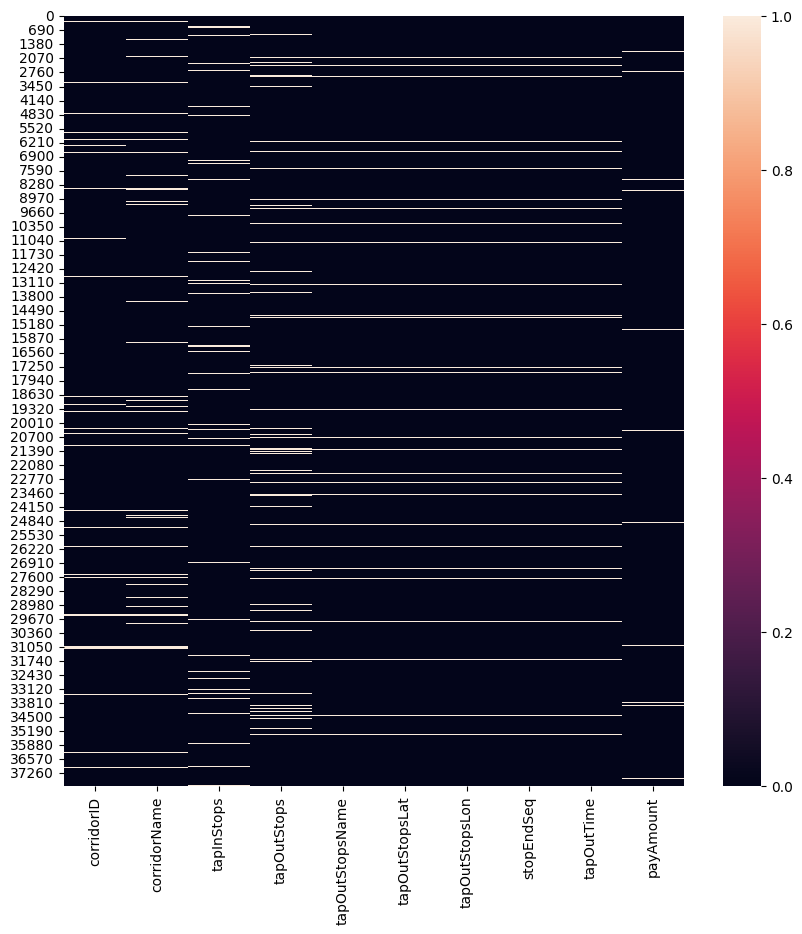

In [ ]:
# Sebaran missing value di dalam data
plt.figure(figsize=(10,10))
sns.heatmap(transjakarta_df[['corridorID','corridorName','tapInStops','tapOutStops','tapOutStopsName','tapOutStopsLat','tapOutStopsLon','stopEndSeq', 'tapOutTime', 'payAmount']].isna())

Secara garis besar:
* *missing value* di kolom `corridorID`, `tapInStops`, `tapOutStops`, `corridorName`, `tapOutStopsName`, `tapOutStopsLat`, `tapOutStopsLon`, `stopEndSeq`, `tapOutTime`, `payAmount`, memiliki porsi yang tidak tinggi yaitu dibawah 10%

Ada 2 cara untuk menangani missing value:

* pertama, menghapus baris/kolom yang berisi missing value. Cara ini tidak disarankan jika data yang di buang terlalu banyak.
* kedua, mengisi data yang hilang. Cara ini disarankan. Ada beberapa metode yang bisa digunakan untuk mengisi missing value, cara yang paling baik adalah dengan mengisi data yang hilang dengan nilai sebenarnya, atau sedekat mungkin dengan nilai asli.

Dalam kasus ini, kita mnggunakan 2 cara tersebut.

Kita sudah melihat gambaran kasar anomali di dalam data kita, sekarang, mari kita lihat dan tangani tiap-tiap anomali secara lebih jauh.

#### `PayAmount`

payAmount: Jumlah yang harus dibayar pelanggan. Ada yang gratis. Beberapa tidak. Bagi yang tidak ada nilainya, kita anggap gratis. karena tidak mungkin untuk diisi dengan rata-rata, median, atau modus. Dalam hal ini besarnya uang hanya 3000, 20000, dan 0.

In [ ]:
transjakarta_df['payAmount'].fillna(0, inplace=True)

In [ ]:
# jumlah missing value di kolom 'corridorID' dan 'corridorName'
transjakarta_df[['payAmount']].isna().sum()

payAmount    0
dtype: int64



####  `corridorID, tapInStops, tapOutStops, corridorName, tapOutStopsName, tapOutStopsLat, tapOutStopsLon, stopEndSeq, tapOutTime`


Karena tidak dimungkinkan untuk mencocokkan dan mengisi satu persatu dan sulitnya untuk mengetahui korelasi antar kolom dari banyaknya sehingga data berisi *missing value* di drop

In [ ]:
transjakarta_df.dropna(inplace=True)

In [ ]:
transjakarta_df.isna().sum().sum()

0

## Data yang Sudah Bersih
Kita sudah selesai membersihkan data kita, sekarang, mari kita lihat sekilas informasi dari data yang sudah kita bersihkan

In [ ]:
listItem = []
for col in transjakarta_df.columns :
    listItem.append([col, transjakarta_df[col].dtype, transjakarta_df[col].isna().sum(),
                    transjakarta_df[col].nunique(), list(transjakarta_df[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'unique', 'uniqueSample'],
                     data=listItem)
print(transjakarta_df.shape)
dfDesc

(32595, 22)


,dataFeatures,dataType,null,unique,uniqueSample
0,transID,object,0,32595,"[RNFU871C8A59HV, FDER703R3P11HU]"
1,payCardID,int64,0,1959,"[213186627613334, 180097982588566]"
2,payCardBank,object,0,6,"[brizzi, bni]"
3,payCardName,object,0,1952,"[Tri Handayani, Luhung Rahmawati, M.Ak]"
4,payCardSex,object,0,2,"[F, M]"
5,payCardBirthDate,int64,0,66,"[1969, 1947]"
6,corridorID,object,0,221,"[10B, JAK.02]"
7,corridorName,object,0,216,"[Pancoran - Kampung Rambutan, Blok M - Kota]"
8,direction,float64,0,2,"[0.0, 1.0]"
9,tapInStops,object,0,2454,"[B06835P, B05488P]"


Sebelum dibersihkan, kita memiliki 37900 baris data, sekarang kita memiliki 32595 baris. Sekitar 5322 baris data yang kosong dihapus, dan sisa data kosong diisi dengan data yang dirasa relevan.

# Exploratory Data Analysis

## Berdasarkan Profil Pelanggan : `payCardSex` dan `payCardBirthDate`


Pertama, mari kita melihat & menganalisis informasi seperti jenis kelamin dan tahun kelahiran untuk memahami profil demografis pelanggan yang menggunakan layanan Transjakarta. Ini dapat membantu dalam mengarahkan strategi pemasaran dan penawaran layanan yang lebih tepat sasaran.

1. Bagaimana distribusi jumlah transaksi berdasarkan jenis kelamin pelanggan?
2. Bagaimana distribusi jumlah transaksi berdasarkan usia pelanggan?
3. Bagaimana distribusi dalam jumlah transaksi antara pelanggan dengan jenis kelamin tertentu pada koridor tertentu?
4. Bagaimana hubungan antara jenis kelamin pelanggan dan durasi perjalanan (tap in - tap out)?


In [ ]:
# Menghitung distribusi jumlah transaksi berdasarkan jenis kelamin pelanggan
transaksi_berdasarkan_jenis_kelamin = transjakarta_df['payCardSex'].value_counts()

# Menampilkan distribusi jumlah transaksi berdasarkan jenis kelamin pelanggan
print(transaksi_berdasarkan_jenis_kelamin)

F    17381
M    15214
Name: payCardSex, dtype: int64


Berdasarkan analisa yang ada, jenis kelamin dari customer yang memakai transjakarta, perempuan lebih banyak dari pria, dimana wanita berjumlah 17381 dan pria berjumlah 15214

In [ ]:
# Menghitung usia pelanggan dari tahun kelahiran (misalnya, 2024 - tahun kelahiran)
transjakarta_df['Usia'] = 2024 - transjakarta_df['payCardBirthDate']

# Menghitung distribusi jumlah transaksi berdasarkan usia pelanggan
transaksi_berdasarkan_usia = transjakarta_df['Usia'].value_counts()

# Menampilkan distribusi jumlah transaksi berdasarkan usia pelanggan
print(transaksi_berdasarkan_usia)

32    1205
43    1180
30    1171
37    1133
39    1094
      ... 
61    9   
75    8   
69    5   
70    3   
66    3   
Name: Usia, Length: 66, dtype: int64


Dari analisa yang di lakukan, usia rentang 20-40 adalah usia yang paling banyak menggunakan transjakarta, dimana apabila usia customer memasuki usia sekolah, kemungkinan customer memakai untuk bersekolah, ataupun lainnya seperti bertamasya, dan jika bukan umur sekolah, maka untuk perjalanan kerja atau perjalanan lain seperti urusan pribadi

In [ ]:
# Menghitung jumlah transaksi berdasarkan jenis kelamin pelanggan dan koridor tertentu
transaksi_berdasarkan_kelamin_dan_koridor = transjakarta_df.groupby(['corridorID', 'payCardSex']).size()

# Menampilkan jumlah transaksi berdasarkan jenis kelamin pelanggan dan koridor tertentu
print(transaksi_berdasarkan_kelamin_dan_koridor)

corridorID  payCardSex
1           F             34 
            M             176
10          F             22 
            M             67 
10A         F             74 
                          .. 
S31         M             44 
T11         F             197
            M             39 
T21         F             51 
            M             111
Length: 442, dtype: int64


## Berdasarkan Pola Perjalanan : `corridorID` dan `corridorName`,

1. Apa rute yang paling sering digunakan oleh pelanggan?
2. Titik mana yang merupakan titik awal titik akhir  perjalanan yang paling umum bagi pelanggan?
3. Bagaimana distribusi waktu perjalanan dari tap masuk (tap in) hingga tap keluar (tap out)?
4. Bagaimana pola perjalanan berdasarkan arah rute (maju atau kembali)?

In [ ]:
# Menghitung jumlah transaksi berdasarkan rute (koridor)
jumlah_transaksi_per_rute = transjakarta_df['corridorName'].value_counts()

# Menampilkan rute yang paling sering digunakan oleh pelanggan
rute_terbanyak = jumlah_transaksi_per_rute.idxmax()
jumlah_terbanyak = jumlah_transaksi_per_rute.max()
print(f"Rute yang paling sering digunakan oleh pelanggan adalah {rute_terbanyak} dengan jumlah transaksi sebanyak {jumlah_terbanyak}.")

Rute yang paling sering digunakan oleh pelanggan adalah Cibubur - Balai Kota dengan jumlah transaksi sebanyak 362.


In [ ]:
# Menghitung jumlah transaksi berdasarkan titik awal perjalanan (tap in)
jumlah_tap_in = transjakarta_df['tapInStopsName'].value_counts()

# Menghitung jumlah transaksi berdasarkan titik akhir perjalanan (tap out)
jumlah_tap_out = transjakarta_df['tapOutStopsName'].value_counts()

# Menampilkan titik awal dan titik akhir perjalanan yang paling umum
titik_awal_terbanyak = jumlah_tap_in.idxmax()
jumlah_tap_in_terbanyak = jumlah_tap_in.max()
titik_akhir_terbanyak = jumlah_tap_out.idxmax()
jumlah_tap_out_terbanyak = jumlah_tap_out.max()

print(f"Titik awal perjalanan yang paling umum adalah '{titik_awal_terbanyak}' dengan jumlah transaksi sebanyak {jumlah_tap_in_terbanyak}.")
print(f"Titik akhir perjalanan yang paling umum adalah '{titik_akhir_terbanyak}' dengan jumlah transaksi sebanyak {jumlah_tap_out_terbanyak}.")

Titik awal perjalanan yang paling umum adalah 'Penjaringan' dengan jumlah transaksi sebanyak 208.
Titik akhir perjalanan yang paling umum adalah 'BKN' dengan jumlah transaksi sebanyak 274.


In [ ]:
# Mengubah kolom waktu menjadi tipe datetime
transjakarta_df['tapInTime'] = pd.to_datetime(transjakarta_df['tapInTime'])
transjakarta_df['tapOutTime'] = pd.to_datetime(transjakarta_df['tapOutTime'])

# Menghitung durasi perjalanan dari tap masuk (tap in) hingga tap keluar (tap out)
transjakarta_df['Durasi Perjalanan'] = transjakarta_df['tapOutTime'] - transjakarta_df['tapInTime']

# Menampilkan distribusi waktu perjalanan
print(transjakarta_df['Durasi Perjalanan'].describe())

count    32595                    
mean     0 days 01:12:13.796226415
std      0 days 00:28:04.160927098
min      0 days 00:15:00          
25%      0 days 00:51:10          
50%      0 days 01:12:06          
75%      0 days 01:35:47          
max      0 days 02:59:03          
Name: Durasi Perjalanan, dtype: object


Rata-rata durasi perjalanan berkisar pada waktu 1 jam 12 menit 13 detik, dan minimum pada 15 menit, dan maksimal pada hampir 3 jam, pertanyaan yang patut di jadikan acuan, adalah, apakah lama rute dipengaruhi tujuan, atau kemacetan ibu kota ?

In [ ]:
# Menghitung jumlah transaksi berdasarkan arah rute (maju atau kembali)
pola_perjalanan = transjakarta_df['direction'].value_counts()

# Menampilkan pola perjalanan berdasarkan arah rute
print(pola_perjalanan)

1.0    16316
0.0    16279
Name: direction, dtype: int64


Jumlah transaksi pulang dan pergi tidak jauh berbeda,  0 menunjukkan transasksi pergi, 1 untuk Kembali/pulang. Masing- masing arah memiliki jumlah transaksi pada angka 16.000 transaksi. Sehingga pelanggan memang memilki rutinitas pulang pergi dengan Transjakarta.

## Berdasarkan Penggunaan Kartu dan Pembayaran: `payCardSex`, `payCardBank`, `payCardBirthDate`

1. Apa jenis kartu pembayaran yang paling sering digunakan oleh pelanggan? dab Bagaimana distribusi pnggunaan kartu?
2. Bagaimana distribusi penggunaan kartu pembayaran berdasarkan jenis kelamin pelanggan?
3. Apakah terdapat perbedaan dalam preferensi pembayaran antara pelanggan berdasarkan usia atau generasi?



In [ ]:
# Menghitung jumlah transaksi berdasarkan jenis kartu pembayaran
jenis_kartu_terbanyak = transjakarta_df['payCardBank'].value_counts().idxmax()

# Menampilkan jenis kartu pembayaran yang paling sering digunakan oleh pelanggan
print(f"Jenis kartu pembayaran yang paling sering digunakan oleh pelanggan adalah: {jenis_kartu_terbanyak}")

Jenis kartu pembayaran yang paling sering digunakan oleh pelanggan adalah: dki


In [ ]:
# Menghitung distribusi penggunaan kartu pembayaran
distribusi_kartu = transjakarta_df['payCardBank'].value_counts()

# Menampilkan distribusi penggunaan kartu pembayaran
print(distribusi_kartu)

dki       16035
emoney    5937 
brizzi    3058 
flazz     2782 
online    2486 
bni       2297 
Name: payCardBank, dtype: int64


In [ ]:
# Menghitung distribusi penggunaan kartu pembayaran berdasarkan jenis kelamin pelanggan
distribusi_kartu_per_jenis_kelamin = transjakarta_df.groupby('payCardSex')['payCardBank'].value_counts()

# Menampilkan distribusi penggunaan kartu pembayaran berdasarkan jenis kelamin pelanggan
print(distribusi_kartu_per_jenis_kelamin)

payCardSex  payCardBank
F           dki            8203
            emoney         3500
            flazz          1584
            brizzi         1577
            bni            1306
            online         1211
M           dki            7832
            emoney         2437
            brizzi         1481
            online         1275
            flazz          1198
            bni            991 
Name: payCardBank, dtype: int64


hal yang dapat di artikan adalah, dki tetap menjadi pilihan utama warga dki, disusul oleh emoney, dimana hal ini berkemungkinan karena, emoney dapat diisi darimana pun

In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency

# Membuat kolom baru untuk menghitung usia pelanggan
transjakarta_df['usia'] = 2024 - pd.to_datetime(transjakarta_df['payCardBirthDate']).dt.year

# Fungsi untuk mengelompokkan usia menjadi kategori generasi
def kategori_generasi(usia):
    if usia >= 1946 and usia <= 1964:
        return 'Baby Boomers'
    elif usia >= 1965 and usia <= 1980:
        return 'Generasi X'
    elif usia >= 1981 and usia <= 1996:
        return 'Generasi Y (Millennials)'
    elif usia >= 1997:
        return 'Generasi Z'
    else:
        return 'Usia tidak valid'

# Menambahkan kolom kategori generasi
transjakarta_df['generasi'] = transjakarta_df['usia'].apply(kategori_generasi)

# Membuat tabel kontingensi antara jenis pembayaran dan generasi
contingency_table = pd.crosstab(transjakarta_df['payCardBank'], transjakarta_df['generasi'])

# Melakukan uji chi-square
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Menampilkan hasil uji chi-square
print("Hasil Uji Chi-Square:")
print(f"Nilai Chi-Square: {chi2}")
print(f"p-value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected frequencies:")
print(expected)


Hasil Uji Chi-Square:
Nilai Chi-Square: 0.0
p-value: 1.0
Degrees of Freedom: 0
Expected frequencies:
[[ 2297.]
 [ 3058.]
 [16035.]
 [ 5937.]
 [ 2782.]
 [ 2486.]]


Hasil uji Chi-Square menunjukkan nilai Chi-Square sebesar 0.0 dan nilai p-value sebesar 1.0. Nilai Degrees of Freedom adalah 0, dan frekuensi yang diharapkan adalah sebagai berikut:

* Baby Boomers: 2297
* Generasi X: 3058
* Generasi Y (Millennials): 16035
* Generasi Z: 5937
* Usia tidak valid: 2782
* Nilai tidak valid: 2486
* Dengan p-value sebesar 1.0, kita tidak memiliki cukup bukti untuk menolak hipotesis nol. Ini menunjukkan bahwa tidak ada perbedaan yang signifikan dalam preferensi pembayaran antara kelompok generasi.

## Berdasarkan Analisa Koridor : `corridorID`, `direction`, dan `tapInStops`

1. Koridor mana yang memiliki jumlah transaksi paling tinggi dan paling rendah?
2. Bagaimana distribusi jumlah transaksi berdasarkan arah perjalanan (maju atau kembali) pada setiap koridor?
3. Bagaimana hubungan antara jumlah transaksi dan jumlah pemberhentian (stop) pada setiap koridor?


In [ ]:
# Menghitung jumlah transaksi untuk setiap koridor
jumlah_transaksi_per_koridor = transjakarta_df.groupby('corridorID').size()

# Koridor dengan jumlah transaksi tertinggi
koridor_tertinggi = jumlah_transaksi_per_koridor.idxmax()
jumlah_transaksi_tertinggi = jumlah_transaksi_per_koridor.max()

# Koridor dengan jumlah transaksi terendah
koridor_terendah = jumlah_transaksi_per_koridor.idxmin()
jumlah_transaksi_terendah = jumlah_transaksi_per_koridor.min()

# Menampilkan hasil
print(f"Koridor dengan jumlah transaksi paling tinggi adalah Koridor {koridor_tertinggi} dengan {jumlah_transaksi_tertinggi} transaksi.")
print(f"Koridor dengan jumlah transaksi paling rendah adalah Koridor {koridor_terendah} dengan {jumlah_transaksi_terendah} transaksi.")

Koridor dengan jumlah transaksi paling tinggi adalah Koridor 1T dengan 362 transaksi.
Koridor dengan jumlah transaksi paling rendah adalah Koridor M5 dengan 13 transaksi.


Bus dengen jumlah transaksi paling banyak yaitu bis 1T dengan korider atau rute Cibubur -Balai Kota

In [ ]:
# Menghitung jumlah transaksi berdasarkan koridor dan arah perjalanan
jumlah_transaksi_per_koridor_dan_arah = transjakarta_df.groupby(['corridorID', 'direction']).size()

# Menampilkan distribusi jumlah transaksi berdasarkan arah perjalanan pada setiap koridor
print(jumlah_transaksi_per_koridor_dan_arah)

corridorID  direction
1           0.0          104
            1.0          106
10          0.0          44 
            1.0          45 
10A         0.0          66 
                         .. 
S31         1.0          71 
T11         0.0          119
            1.0          117
T21         0.0          80 
            1.0          82 
Length: 442, dtype: int64


In [ ]:
# Menghitung jumlah transaksi per koridor
jumlah_transaksi_per_koridor = transjakarta_df['corridorID'].value_counts()

# Menghitung jumlah pemberhentian (stop) per koridor
jumlah_stop_per_koridor = transjakarta_df.groupby('corridorID')['tapInStops'].nunique()

# Menggabungkan kedua DataFrame
data = pd.DataFrame({'jumlahTransaksi': jumlah_transaksi_per_koridor, 'Jumlah Stop': jumlah_stop_per_koridor})

# Periksa korelasi antara jumlah transaksi dan jumlah pemberhentian (stop)
korelasi = data['jumlahTransaksi'].corr(data['Jumlah Stop'])

# Tampilkan korelasi
print("Korelasi antara jumlah transaksi dan jumlah pemberhentian (stop):", korelasi)

Korelasi antara jumlah transaksi dan jumlah pemberhentian (stop): 0.5247339442044677


Korelasi antara jumlah transaksi dan jumlah pemberhentian adalah 0.524, yang menunjukkan adanya korelasi positif antara kedua variabel tersebut. Nilai korelasi yang positif menunjukkan bahwa terdapat kecenderungan bahwa semakin banyak jumlah transaksi yang dilakukan, semakin tinggi juga jumlah pemberhentian yang dilakukan.

## Berdasarkan Analisa Waktu: `tapInTime`

1. Bagaimana pola perjalanan berdasarkan waktu harian (pagi, siang, malam)?
2. Bagaimana distribusi jumlah transaksi berdasarkan hari dalam seminggu?
3. Bagaimana tren penggunaan layanan dari waktu ke waktu (harian, mingguan, bulanan)?


In [ ]:
# Ubah kolom waktu tap masuk (tap in) menjadi tipe data datetime
transjakarta_df['tapInTime'] = pd.to_datetime(transjakarta_df['tapInTime'])

# Tentukan interval waktu untuk pagi, siang, dan malam
pagi = (6, 12)  # Jam 6 pagi hingga jam 12 siang
siang = (12, 18)  # Jam 12 siang hingga jam 6 sore
malam = (18, 24)  # Jam 6 sore hingga jam 12 malam

# Fungsi untuk menentukan interval waktu berdasarkan jam
def interval_waktu(jam):
    if pagi[0] <= jam.hour < pagi[1]:
        return 'Pagi'
    elif siang[0] <= jam.hour < siang[1]:
        return 'Siang'
    elif malam[0] <= jam.hour < malam[1]:
        return 'Malam'

# Menambahkan kolom interval waktu ke dataframe
transjakarta_df['intervalWaktu'] = transjakarta_df['tapInTime'].apply(interval_waktu)

# Menghitung jumlah transaksi di setiap interval waktu
jumlah_transaksi_per_interval = transjakarta_df['intervalWaktu'].value_counts()

# Tampilkan hasil
print("Jumlah transaksi per interval waktu:")
print(jumlah_transaksi_per_interval)

Jumlah transaksi per interval waktu:
Pagi     12877
Siang    8717 
Malam    8126 
Name: intervalWaktu, dtype: int64


Pola perjalanan terbanyak ditemukan pada pagi hari, hal ini dikarenakan perjalanan sekolah dan kerja yang tinggi di daerah ibu kota, di ikuti oleh jam siang yang berkemungkinan di gunakan untuk bepergian individu seperti berobat, dan waktu malam, untuk orang yang pulang bekerja.

In [ ]:
# Ubah kolom tapInTime menjadi tipe data datetime
transjakarta_df['tapInTime'] = pd.to_datetime(transjakarta_df['tapInTime'])

# Hitung jumlah transaksi per tanggal
transaksi_per_tanggal = transjakarta_df.groupby(transjakarta_df['tapInTime'].dt.date).size().reset_index(name='jumlah_transaksi')

# Tampilkan hasil
print(transaksi_per_tanggal)

     tapInTime  jumlah_transaksi
0   2023-04-01  12              
1   2023-04-02  5               
2   2023-04-03  1357            
3   2023-04-04  1400            
4   2023-04-05  1382            
5   2023-04-06  1376            
6   2023-04-07  1395            
7   2023-04-08  306             
8   2023-04-09  322             
9   2023-04-10  1387            
10  2023-04-11  1383            
11  2023-04-12  1375            
12  2023-04-13  1735            
13  2023-04-14  1736            
14  2023-04-15  635             
15  2023-04-16  668             
16  2023-04-17  1741            
17  2023-04-18  1738            
18  2023-04-19  1722            
19  2023-04-20  1410            
20  2023-04-21  1407            
21  2023-04-22  320             
22  2023-04-23  282             
23  2023-04-24  1365            
24  2023-04-25  1390            
25  2023-04-26  1377            
26  2023-04-27  1364            
27  2023-04-28  1385            
28  2023-04-29  305             
29  2023-0

Jumlah transaksi per hari dalam seminggu:
0    5850
1    5911
2    5856
3    5885
4    5923
5    1578
6    1592
Name: Hari, dtype: int64


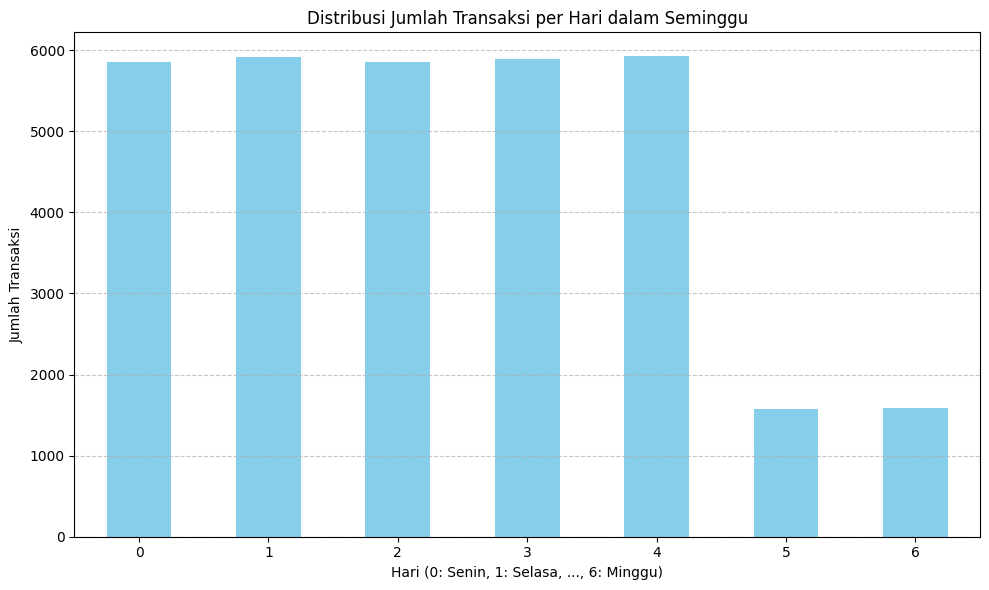

In [ ]:
# Ubah kolom waktu tap masuk (tap in) menjadi tipe data datetime
transjakarta_df['tapInTime'] = pd.to_datetime(transjakarta_df['tapInTime'])

# Dapatkan hari dalam seminggu (0 untuk Senin, 1 untuk Selasa, ..., 6 untuk Minggu)
transjakarta_df['Hari'] = transjakarta_df['tapInTime'].dt.dayofweek

# Menghitung jumlah transaksi di setiap hari dalam seminggu
jumlah_transaksi_per_hari = transjakarta_df['Hari'].value_counts().sort_index()

# Tampilkan hasil
print("Jumlah transaksi per hari dalam seminggu:")
print(jumlah_transaksi_per_hari)

# Visualisasikan distribusi jumlah transaksi
plt.figure(figsize=(10, 6))
jumlah_transaksi_per_hari.plot(kind='bar', color='skyblue')
plt.title('Distribusi Jumlah Transaksi per Hari dalam Seminggu')
plt.xlabel('Hari (0: Senin, 1: Selasa, ..., 6: Minggu)')
plt.ylabel('Jumlah Transaksi')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
!pip freeze pandas

absl-py==1.4.0
aiohttp==3.9.3
aiosignal==1.3.1
alabaster==0.7.16
albumentations==1.3.1
altair==4.2.2
annotated-types==0.6.0
anyio==3.7.1
appdirs==1.4.4
argon2-cffi==23.1.0
argon2-cffi-bindings==21.2.0
array-record==0.5.0
arviz==0.15.1
astropy==5.3.4
astunparse==1.6.3
async-timeout==4.0.3
atpublic==4.0
attrs==23.2.0
audioread==3.0.1
autograd==1.6.2
Babel==2.14.0
backcall==0.2.0
beautifulsoup4==4.12.3
bidict==0.23.1
bigframes==1.0.0
bleach==6.1.0
blinker==1.4
blis==0.7.11
blosc2==2.0.0
bokeh==3.3.4
bqplot==0.12.43
branca==0.7.1
build==1.2.1
CacheControl==0.14.0
cachetools==5.3.3
catalogue==2.0.10
certifi==2024.2.2
cffi==1.16.0
chardet==5.2.0
charset-normalizer==3.3.2
chex==0.1.86
click==8.1.7
click-plugins==1.1.1
cligj==0.7.2
cloudpathlib==0.16.0
cloudpickle==2.2.1
cmake==3.27.9
cmdstanpy==1.2.2
colorcet==3.1.0
colorlover==0.3.0
colour==0.1.5
community==1.0.0b1
confection==0.1.4
cons==0.4.6
contextlib2==21.6.0
contourpy==1.2.0
cryptography==42.0.5
cufflinks==0.17.3
cupy-cuda12x==12.2.0
c

Ditemukan, hari senin hingga jumat adalah jumlah dimana banyak nya transaksi, hal ini dikarenakan perjalanan sekolah dan kerja yang memiliki rentang waktu 5 hari / minggu

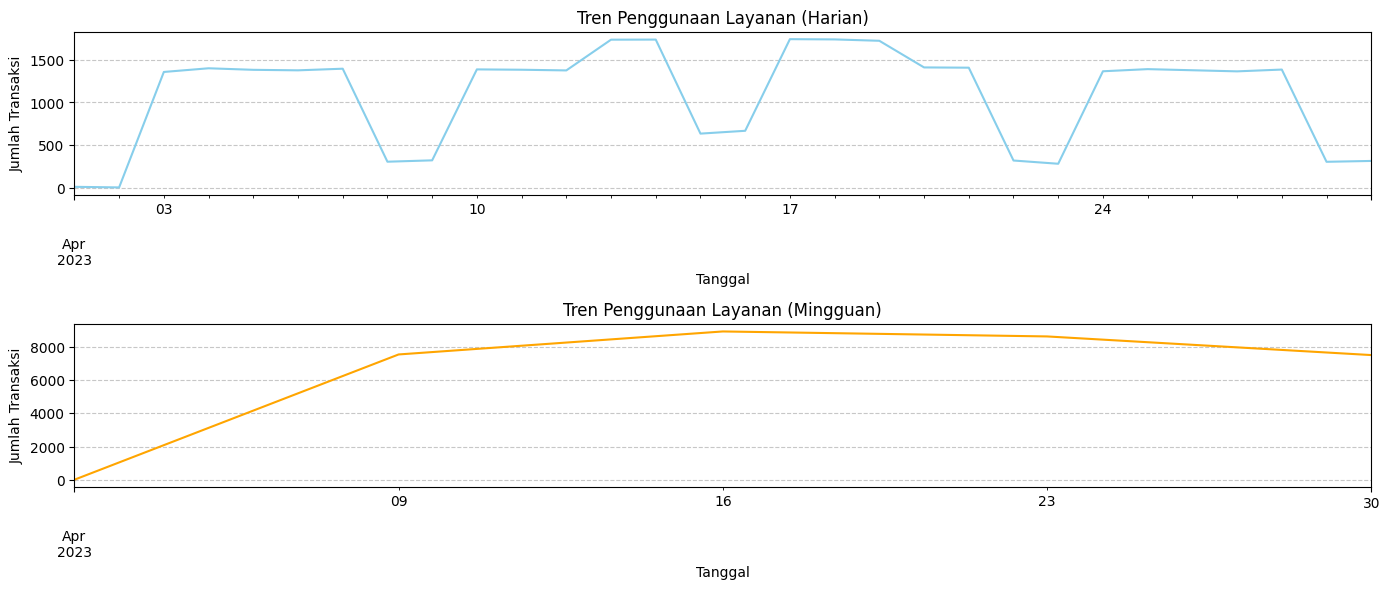

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Ubah kolom waktu tap masuk (tap in) menjadi tipe data datetime
transjakarta_df['tapInTime'] = pd.to_datetime(transjakarta_df['tapInTime'])

# Set kolom waktu tap masuk sebagai indeks dataframe
transjakarta_df.set_index('tapInTime', inplace=True)

# Hitung jumlah transaksi harian
transaksi_harian = transjakarta_df.resample('D').size()

# Hitung jumlah transaksi mingguan
transaksi_mingguan = transjakarta_df.resample('W').size()

# Hitung jumlah transaksi bulanan
transaksi_bulanan = transjakarta_df.resample('M').size()

# Visualisasikan tren penggunaan layanan
plt.figure(figsize=(14, 8))

# Plot tren harian
plt.subplot(3, 1, 1)
transaksi_harian.plot(color='skyblue')
plt.title('Tren Penggunaan Layanan (Harian)')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Transaksi')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Plot tren mingguan
plt.subplot(3, 1, 2)
transaksi_mingguan.plot(color='orange')
plt.title('Tren Penggunaan Layanan (Mingguan)')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Transaksi')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


Pernyataan lima hari tersebut di dukung juga dengan adanya pattern perulangan pada tren penggunaan harian di transjakarta

In [ ]:
# Drop kolom generasi, intervalWaktu, Hari dari DataFrame
transjakarta_df.drop(columns=['generasi', 'intervalWaktu', 'Hari'], inplace=True)

# Menampilkan DataFrame setelah menjatuhkan kolom
print(transjakarta_df.head())

                            transID         payCardID payCardBank  \
tapInTime                                                           
2023-04-03 05:21:44  EIIW227B8L34VB  180062659848800   emoney       
2023-04-03 05:42:44  LGXO740D2N47GZ  4885331907664776  dki          
2023-04-03 05:59:06  DJWR385V2U57TO  4996225095064169  dki          
2023-04-03 05:44:51  JTUZ800U7C86EH  639099174703      flazz        
2023-04-03 06:17:35  VMLO535V7F95NJ  570928206772      flazz        

                         payCardName payCardSex  payCardBirthDate corridorID  \
tapInTime                                                                      
2023-04-03 05:21:44  Bajragin Usada   M          2008              5           
2023-04-03 05:42:44  Gandi Widodo     F          1997              6C          
2023-04-03 05:59:06  Emong Wastuti    F          1992              R1A         
2023-04-03 05:44:51  Surya Wacana     F          1978              11D         
2023-04-03 06:17:35  Embuh Mardhiyah

In [ ]:
transjakarta_df.to_csv('TransjakartaEDA.csv', index=False)

# Membaca file CSV
transjakartaEDA_df = pd.read_csv("TransjakartaEDA.csv")


In [ ]:
transjakartaEDA_df.head()

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount,Usia,Durasi Perjalanan,usia
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,...,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0,16,0 days 00:39:09,54
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,...,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0,27,0 days 00:57:17,54
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,...,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0,32,0 days 00:51:49,54
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,...,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0,46,0 days 00:43:25,54
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,...,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0,42,0 days 00:39:28,54


In [ ]:
transjakartaEDA_df['payCardID'] = transjakartaEDA_df['payCardID'].astype(str)


In [ ]:
transjakartaEDA_df.isna().sum().sum()

0

# Mapping


'TapInStopLats.png'

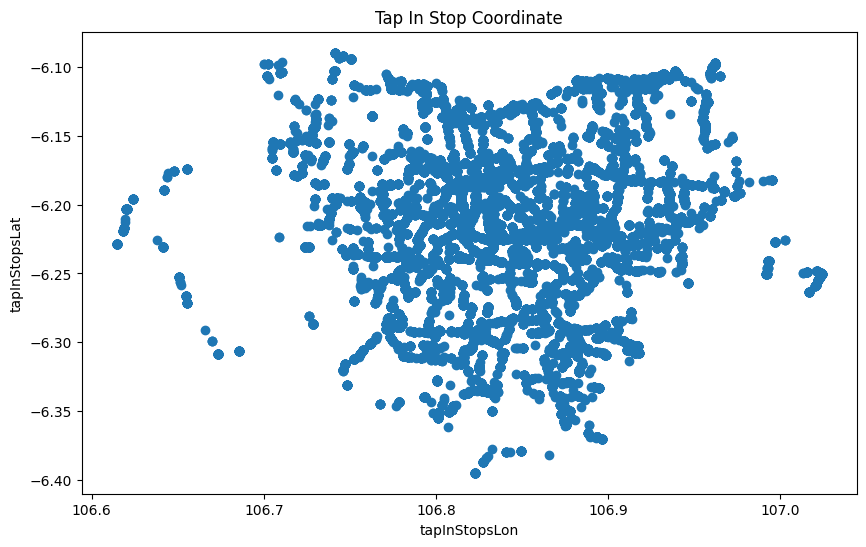

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import pandas as pd


# Re-plotting the clusters
plt.figure(figsize=(10, 6))
plt.scatter(transjakartaEDA_df['tapInStopsLon'], transjakartaEDA_df['tapInStopsLat'])
plt.title('Tap In Stop Coordinate')
plt.xlabel('tapInStopsLon')
plt.ylabel('tapInStopsLat')
# plt.colorbar(label='Cluster Label')

# Saving the plot to an image file
plot_file_path = 'TapInStopLats.png'
plt.savefig(plot_file_path)

plot_file_path

<ipython-input-107-b264e1d7cd78>:9: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


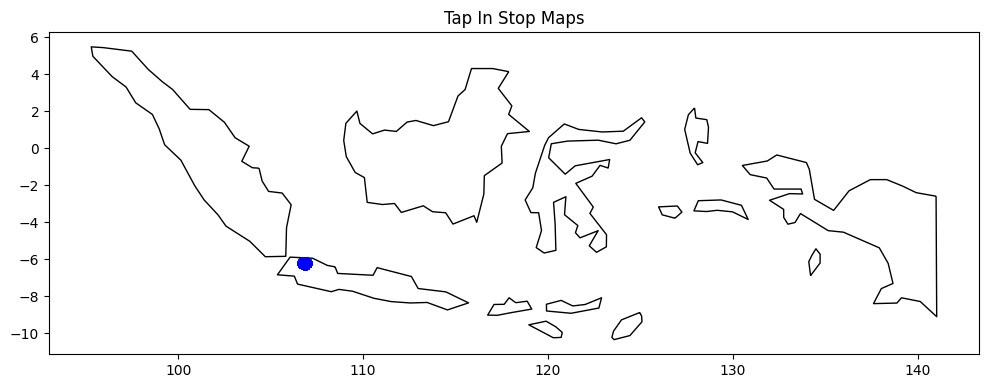

In [ ]:
import geopandas as gpd
from shapely.geometry import Point

# Converting the dataframe to a GeoDataFrame
transjakartaEDA_df['geometry'] = transjakartaEDA_df.apply(lambda row: Point(row['tapInStopsLon'], row['tapInStopsLat']), axis=1)
geo_df = gpd.GeoDataFrame(transjakartaEDA_df, geometry='geometry')

# Load world map data
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Filter for Indonesia map
indonesia_map = world[world.name == "Indonesia"]

# Plotting
fig, ax = plt.subplots(figsize=(12, 8))
indonesia_map.plot(ax=ax, color='white', edgecolor='black')
geo_df.plot(ax=ax, markersize=20, color='blue', marker='o', label='Incidents')
plt.title('Tap In Stop Maps')
plt.show()

'TapOutStopLats.png'

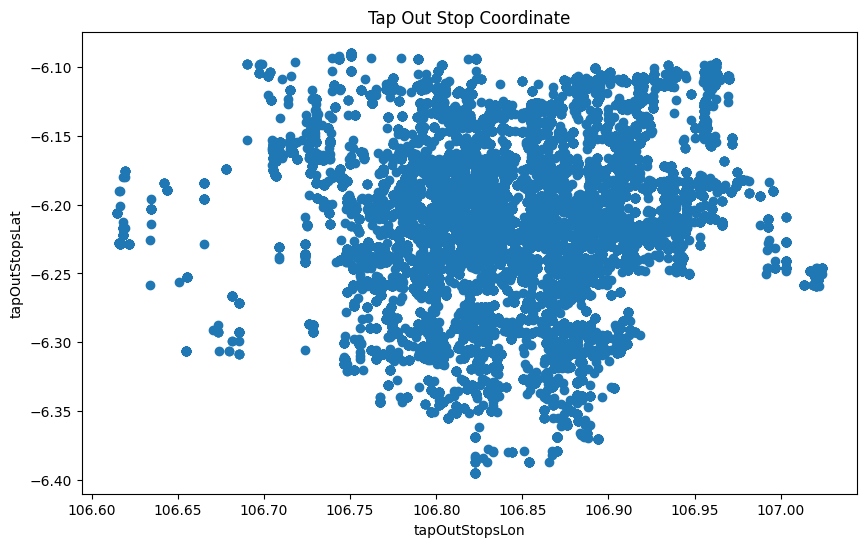

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import pandas as pd


# Re-plotting the clusters
plt.figure(figsize=(10, 6))
plt.scatter(transjakartaEDA_df['tapOutStopsLon'], transjakartaEDA_df['tapInStopsLat'])
plt.title('Tap Out Stop Coordinate')
plt.xlabel('tapOutStopsLon')
plt.ylabel('tapOutStopsLat')
# plt.colorbar(label='Cluster Label')

# Saving the plot to an image file
plot_file_path = 'TapOutStopLats.png'
plt.savefig(plot_file_path)

plot_file_path

<ipython-input-109-92e0c6daa003>:9: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


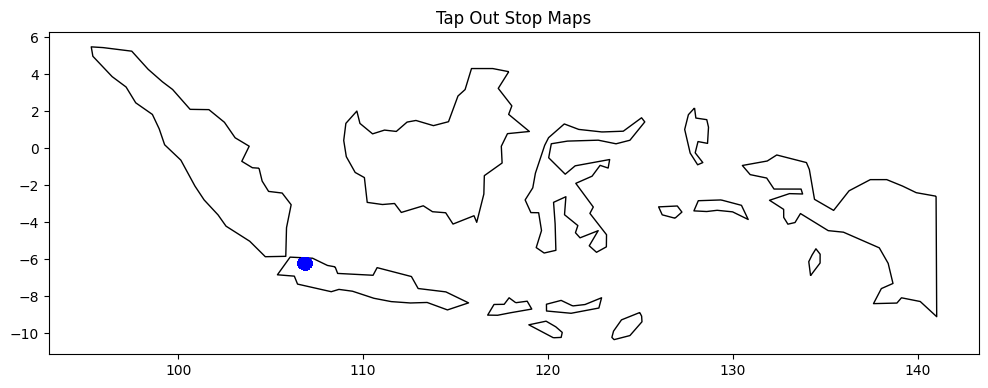

In [ ]:
import geopandas as gpd
from shapely.geometry import Point

# Converting the dataframe to a GeoDataFrame
transjakartaEDA_df['geometry'] = transjakartaEDA_df.apply(lambda row: Point(row['tapOutStopsLon'], row['tapOutStopsLat']), axis=1)
geo_df = gpd.GeoDataFrame(transjakartaEDA_df, geometry='geometry')

# Load world map data
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Filter for Indonesia map
indonesia_map = world[world.name == "Indonesia"]

# Plotting
fig, ax = plt.subplots(figsize=(12, 8))
indonesia_map.plot(ax=ax, color='white', edgecolor='black')
geo_df.plot(ax=ax, markersize=20, color='blue', marker='o', label='Incidents')
plt.title('Tap Out Stop Maps')
plt.show()

# Data Analysis

Pada Exploratory Data Analysis diatas telah dibuat banyak kolom baru yang tidak berkaitan dengan analisa cohort dan RFM yang akan kita lakukan selanjutnya. Lalu data yang akan kita gunakan yaitu data yang sudah kita bersihkan diatas yaitu TransjakartaClean.csv.

## Analisa Cohort

Dalam experiment ini, tujuan Cohort Analysis berupa mengidentifikasi nilai Retention untuk mengukur tingkat kesetian/loyality dari pelanggan. Proses identifikasi ini jauh lebih mudah dan berperan melihat tren perkembangan data pelanggan.
Berikut Hasil visualisasi Retentiaon perminggu

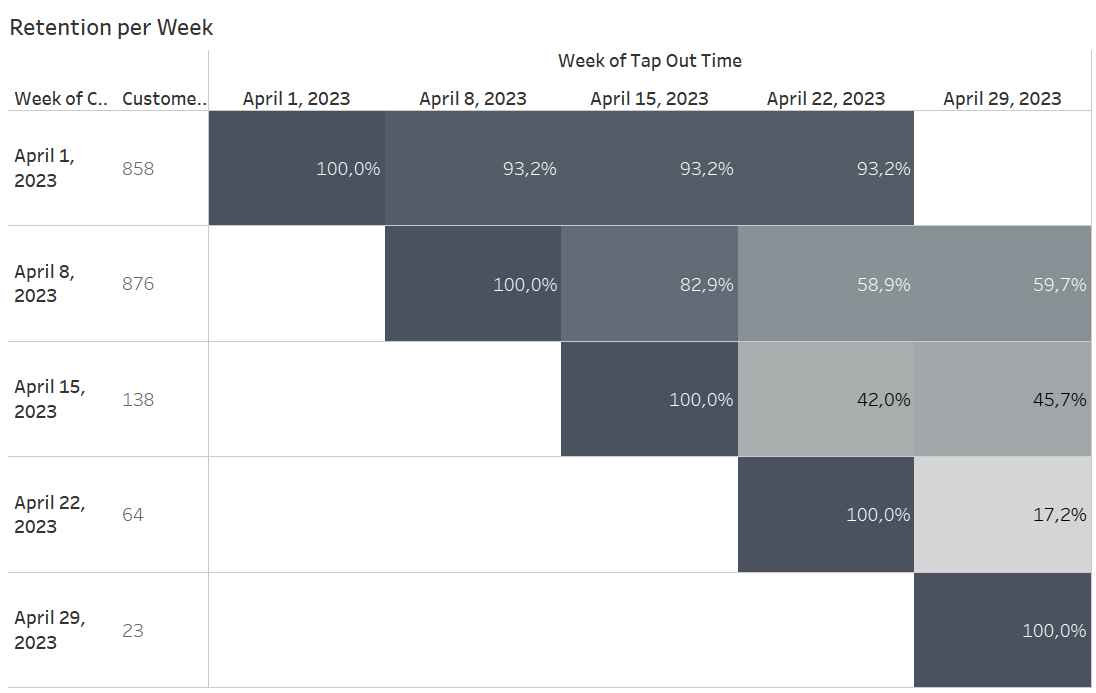

Berdasarkan tabel diatas ditemukan bahwa pelanggan baru pada minggu kedua, pelanggan kembali lagi pada minggu ketiga dengan persetase tinggi sebesar 83%, namun pada minggu keempat pelanggan baru tersebut tidak banyak kembali ini ditunjukkan dengan kecilnya angka persentase yaitu 59%.

Ditemukan pula, pelanggan baru di minggu ketiga hanya kembali di minggu keempat sebesar 42%.
Pada minggu keempat, pelanggan yang kembali hanya 17%

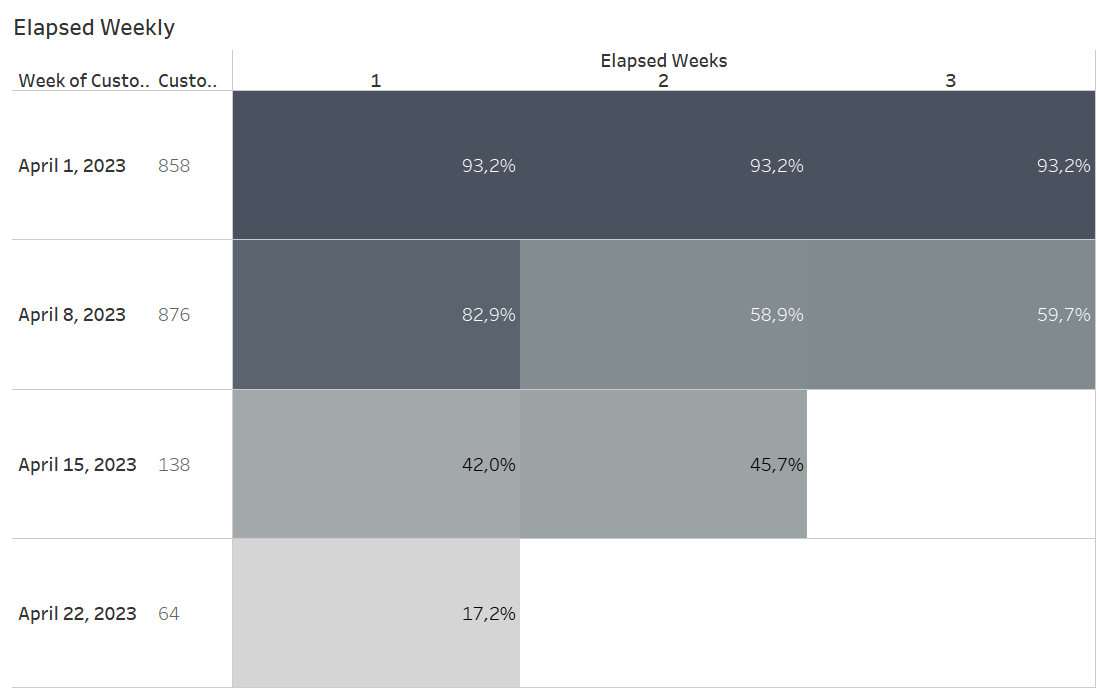

Data kolom ‘0’ yang dihilangkan mencerminkan jumlah data aktif pelanggan pada minggu pertama yang artinya mencerminkan keseluruhan pelanggan yang kita punya pada minggu tersebut. kemdian x/ elpased week juga dikenal sebagai cohort index mencerminkan data pelanggan aktif pada minggu berikutnya berdasarkan minggu pada baris.

Semakin bertambahnya minggu, trend pelanggan aktif semakin berkurang. selain itu, pada minggu 3-4 data yang tersimpan sebagai bulan pembelian pertama mengalami penurunan yang cukup signifikan. Hal ini menjadi indikasi pentingnya menemukan pendekatan terbaik terhadap pelanggan berdasarkan jumlah pelanggan aktif perbulannya.

Berdasarkan data diatas, dapat disimpulkan beberapa insight yang penting :
1. Rata-rata rate pelanggan aktif baru rendah pada minggu-minggu akhir.
2. Jumlah pelanggan terbanyak aktif adalah pelanggan yang terdaftar pada minggu pertama dengan presentase tinggi kembali pada minggu minggu selanjutnya sebesar 93%
3. Persentase pelanggan baru dan aktif pada minggu ke 3 dan ke 4 mengalami penurunan yang signifikan hampir 50% dari minggu sebelumnya, perlunya identifikasi featured atau campaign yang sudah dilakukan.

## Analisa RFM

adalah metode paling umum yang digunakan marketer dalam menganalisa tingkah laku pelanggan, efisiensi dana pembuatan iklan, hingga meningkatkan profit penjualan. Tujuan dari metode RFM Analysis pada kesempatan ini ialah untuk mengkategorikan pelanggan berdasarkan beberapa kriteria. Efektivitas metode ini bergantung pada 3 parameter yang unik

* Recency = waktu berkunjung belakangan/baru-baru ini (Recency yang tinggi akan menjelaskan bahwa pembeli sudah lama sekali tidak bertransaksi)
* Frequency = banyak/jumlah mereka melakukan pembelian (pembelian yang tinggi berarti high-frequency).
* Monetary = banyak uang yang mereka spend untuk membeli (spend yang tinggi berarti high monetary).

Segmentasi Pelanggan:
	Gunakan nilai RFM untuk mengelompokkan pelanggan ke dalam segmen yang berbeda.
	Contoh segmen:

	* Loyal: Recency rendah, Frequency tinggi, Monetary tinggi.
	* Saver: Recency rendah, Frequency tinggi, dan Monetary rendah/sedang.
	* Churn: Recency tinggi, Frequency rendah, Monetary rendah.
	* Potential: Recency tinggi, Frequency rendah, Monetary tinggi


Kita melakukan penghitungan RFM di Tableau dengan rumus/ calculation field :  
* Recency = DATEDIFF('day',[Tap Out Time] , #2023-05-01#)
* Frequency = Jumlah Transaksi per payCardID
* Monetary = {FIXED [Pay Card ID], [Trans ID] : SUM([Pay Amount])}

Setelah kita mendapatkan angka RFM lalu kita proses untuk ditemukan segmentasinya atau kelompoknya dengan K-Means

In [ ]:
import pandas as pd

url = "/content/TransjakartaEDA.csv"

data = pd.read_csv(url)

data.head()

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount,Usia,Durasi Perjalanan,usia
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,...,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0,16,0 days 00:39:09,54
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,...,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0,27,0 days 00:57:17,54
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,...,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0,32,0 days 00:51:49,54
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,...,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0,46,0 days 00:43:25,54
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,...,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0,42,0 days 00:39:28,54


In [ ]:
data.rename(columns={'Pay Card ID': 'payCardID'}, inplace=True)
data.head()

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount,Usia,Durasi Perjalanan,usia
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,...,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0,16,0 days 00:39:09,54
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,...,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0,27,0 days 00:57:17,54
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,...,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0,32,0 days 00:51:49,54
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,...,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0,46,0 days 00:43:25,54
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,...,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0,42,0 days 00:39:28,54


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32595 entries, 0 to 32594
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   transID            32595 non-null  object 
 1   payCardID          32595 non-null  int64  
 2   payCardBank        32595 non-null  object 
 3   payCardName        32595 non-null  object 
 4   payCardSex         32595 non-null  object 
 5   payCardBirthDate   32595 non-null  int64  
 6   corridorID         32595 non-null  object 
 7   corridorName       32595 non-null  object 
 8   direction          32595 non-null  float64
 9   tapInStops         32595 non-null  object 
 10  tapInStopsName     32595 non-null  object 
 11  tapInStopsLat      32595 non-null  float64
 12  tapInStopsLon      32595 non-null  float64
 13  stopStartSeq       32595 non-null  int64  
 14  tapOutStops        32595 non-null  object 
 15  tapOutStopsName    32595 non-null  object 
 16  tapOutStopsLat     325

Langkah selanjutnya adalah melakukan clustering atau segmentasi dengan label yang telah ditentukan. yaitu
* 0 = "saver"
* 1 = "loyal"
* 2 = "potential"
* 3 = "churn"


### Kmeans

In [ ]:
import warnings; warnings.filterwarnings("ignore")

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, max_iter=50)
selected_data = data[['Recency', 'Frequency', 'Monetary']]
kmeans.fit(selected_data)


KeyError: "None of [Index(['Recency', 'Frequency', 'Monetary'], dtype='object')] are in the [columns]"

In [ ]:
data["cluster"] = kmeans.labels_

In [ ]:
# label = ["loyal", "saver", "churn", "potential"]

label = ["saver", "loyal", "potential", "churn"]

In [ ]:
data["cluster"].min(), data["cluster"].max()

In [ ]:
hasil = [label[i] for i in data["cluster"].values]

In [ ]:
data["Segmentasi"] = hasil

data.to_csv("/content/RPM_Segment.csv", index=False)

In [ ]:
data.head()

In [ ]:
data.info()

Setalh itu kita visualisasikan ke dalam pie chart  

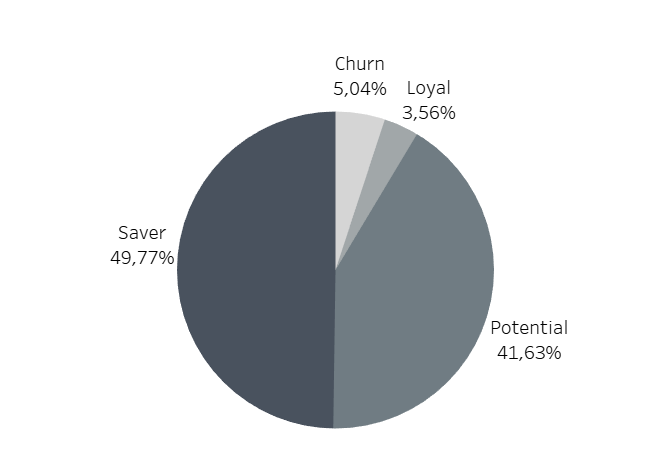

Ditemukan bahwa hampir 50% pengguna Transjakarta adalah Saver atau pemburu diskon, melakukan transaksi dengan ongkos gratis. Selain itu, ditemukan segmen potential sebanyak 11.543 transaksi, segmen churn 1397 transaksi atau hanya 5% dan konsumen segmen loyal hanya 3.56% dengan total transaksi 987.


## **Strategi Marketing**
	Rancang strategi marketing yang sesuai untuk setiap segmen pelanggan.
	Contoh:

	* Loyal: Tawarkan program loyalitas dan diskon khusus.
	* Churn: Tawarkan promo menarik untuk menarik kembali pelanggan.
    * Saver : Tawarkan Program Penghargaan Berbasis Frekuensi dan Bundling serta paket Hemat.
	* Potential: Tawarkan edukasi dan informasi tentang produk.

Simpan dataset untuk visualisasi lebih lanjut ke Tableau

In [ ]:
import pandas as pd

# Gabungkan kedua DataFrame berdasarkan kolom yang sesuai
merged_df = pd.merge(transjakartaEDA_df, data, on='payCardID', how='left')

# Simpan DataFrame gabungan ke dalam file CSV baru
merged_df.to_csv('Merged_Transjakarta_RPM.csv', index=False)

# Tampilkan DataFrame gabungan
print(merged_df.head())
